In [1]:
# 주요 라이브러리 import

import warnings

warnings.filterwarnings(action='ignore')

import time

from IPython.display import Image

import pandas as pd

import numpy as np

 

import matplotlib.pyplot as plt

import seaborn as sns

 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.metrics import *

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 

from sklearn import datasets

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge, Lasso, ElasticNet

 

from matplotlib import rc, font_manager

import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

import matplotlib.pyplot as plt

import matplotlib.font_manager as fm # 폰트 관련 용도

%config InlineBackend.figure_format = 'retina'

 

# 디렉토리 및 파일 이름에 맞추어 변경

#font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.

# font_location = './NanumGothic.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()

# rc('font', family=font_name)

In [2]:
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk 

In [3]:
all_files = glob.glob('./autonomous_vehicles_data/my*.xls')
all_files

['./autonomous_vehicles_data/myCabinetExcelData (4).xls',
 './autonomous_vehicles_data/myCabinetExcelData (8).xls',
 './autonomous_vehicles_data/myCabinetExcelData (9).xls',
 './autonomous_vehicles_data/myCabinetExcelData (5).xls',
 './autonomous_vehicles_data/myCabinetExcelData (2).xls',
 './autonomous_vehicles_data/myCabinetExcelData (3).xls',
 './autonomous_vehicles_data/myCabinetExcelData (1).xls',
 './autonomous_vehicles_data/myCabinetExcelData (6).xls',
 './autonomous_vehicles_data/myCabinetExcelData.xls',
 './autonomous_vehicles_data/myCabinetExcelData (7).xls']

## 파일하나를 읽어서 df에 넣음. 리스트에 누적!

In [4]:
all_files_data = []

In [5]:
for file in all_files:
    df = pd.read_excel(file)
    all_files_data.append(df)
len(all_files_data)

10

In [6]:
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Decision system for a team of autonomous under...,"Praczyk, T.; Szymak, P.","Elsevier Science B.V., Amsterdam.",2011
1,NaN,2,How People Perceive and Expect Safety in Auton...,"Tan, Hao; Chen, Cong; Hao, Yuyue",Taylor & Francis,2021
2,NaN,3,Exploring the impact of connected and autonomo...,"Liu, Pengfei; Fan, Wei David",Taylor & Francis,2021
3,NaN,4,Object Detection Under Rainy Conditions for Au...,"Hnewa, Mazin; Radha, Hayder",INSTITUTE OF ELECTRICAL AND ELECTRONIC ENGINEERS,2020
4,NaN,5,"Corrigendum to ""Fuel economy testing of autono...","Mersky, Avi Chaim; Samaras, Constantine","Elsevier Science B.V., Amsterdam.",2018
...,...,...,...,...,...,...
95,NaN,96,Special issue on Motion Control for Automated ...,"Lidberg, Mathias; Müller, Steffen",Taylor & Francis,2019
96,NaN,97,Autonomous Waypoint Transitioning and Loiterin...,"Smith, Dean W.; Sanfelice, Ricardo",AIAA,2016
97,NaN,98,"Autonomous vehicles, risk perceptions and insu...","Xu, Xian; Fan, Chiang-Ku","Elsevier Science B.V., Amsterdam.",2019
98,NaN,99,Autonomous Control of Combat Unmanned Aerial V...,"Lee, Gyeong Taek; Kim, Chang Ouk",IEEE,2020


In [7]:
all_files_data_concat = pd.concat(all_files_data,
                                  axis=0, #row병합
                                  ignore_index=True
                                 )
all_files_data_concat.tail(2)

,Unnamed: 0,번호,제목,저자,출판사,출판일
998,NaN,99,Multiple Communicating Autonomous Underwater V...,"An, E.; Beaujean, P.-P.; Baud, B.; Carlson, T....",IEEE; 1999,2004
999,NaN,100,Connected and Autonomous Vehicles,"Bo, Y.; Fan, B.; Dressler, F.",IEEE COMPUTER SOCIETY,2018


In [9]:
all_files_data_concat.drop(columns='Unnamed: 0', inplace=True)
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      1000 non-null   int64 
 1   제목      1000 non-null   object
 2   저자      1000 non-null   object
 3   출판사     1000 non-null   object
 4   출판일     1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [10]:
all_files_data_concat.to_csv('./autonomous_vehicles_data/riss_bigdata.csv',
                             encoding='utf-8',
                             index=False)

In [13]:
df1000 = pd.read_csv('./autonomous_vehicles_data/riss_bigdata.csv', encoding='utf-8')
df1000[:3]

,번호,제목,저자,출판사,출판일
0,1,Decision system for a team of autonomous under...,"Praczyk, T.; Szymak, P.","Elsevier Science B.V., Amsterdam.",2011
1,2,How People Perceive and Expect Safety in Auton...,"Tan, Hao; Chen, Cong; Hao, Yuyue",Taylor & Francis,2021
2,3,Exploring the impact of connected and autonomo...,"Liu, Pengfei; Fan, Wei David",Taylor & Francis,2021


## 전처리

In [14]:
# 제목 추출
all_titles = df1000['제목']
all_titles

0      Decision system for a team of autonomous under...
1      How People Perceive and Expect Safety in Auton...
2      Exploring the impact of connected and autonomo...
3      Object Detection Under Rainy Conditions for Au...
4      Corrigendum to "Fuel economy testing of autono...
                             ...                        
995    Radar-on-Chip/in-Package in Autonomous Driving...
996        Development of Autonomous Underwater Vehicles
997    How should autonomous vehicles overtake other ...
998    Multiple Communicating Autonomous Underwater V...
999                    Connected and Autonomous Vehicles
Name: 제목, Length: 1000, dtype: object

In [15]:
stopwords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [16]:
## 1. 글자만 추출(글자가 아닌 것은 공백으로 replace)
## 2. 분석에 사용하지 않을 글자들 제거(불용어 처리)
## 3. 표제어 추출

In [17]:
words = [] ## 전처리한 결과를 모으는 리스트

In [24]:
for title in all_titles:
    ## 1. 전처리 1번: 글자가 아닌 것은 공백으로 대체
    pre1 = re.sub(r"[^a-zA-Z]+", " ", str(title))
    ## 2. 소문자로 변경하여 단어를 토큰으로 마들자.
    pre1_lower_token = word_tokenize(pre1.lower())
    ## 3. 전처리 2번: 불용어 처리
    pre2 = [w for w in pre1_lower_token if w not in stopwords]
    ## 4. 표제어 추출
    pre3 = [lemma.lemmatize(w) for w in pre2]
    words.append(pre3)
words[:3]

[['decision',
  'system',
  'team',
  'autonomous',
  'underwater',
  'vehicle',
  'x',
  'preliminary',
  'report'],
 ['people',
  'perceive',
  'expect',
  'safety',
  'autonomous',
  'vehicle',
  'empirical',
  'study',
  'risk',
  'sensitivity',
  'risk',
  'related',
  'feeling'],
 ['exploring',
  'impact',
  'connected',
  'autonomous',
  'vehicle',
  'mobility',
  'environment',
  'signalized',
  'intersection',
  'vehicle',
  'infrastructure',
  'v',
  'infrastructure',
  'vehicle',
  'v',
  'communication']]

In [26]:
words2 = reduce(lambda x, y: x + y, words)
print(type(words2))

words2[:10]

<class 'list'>


['decision',
 'system',
 'team',
 'autonomous',
 'underwater',
 'vehicle',
 'x',
 'preliminary',
 'report',
 'people']

In [28]:
count = Counter(words2)
count

Counter({'decision': 70,
         'system': 658,
         'team': 35,
         'autonomous': 7105,
         'underwater': 1204,
         'vehicle': 7399,
         'x': 21,
         'preliminary': 21,
         'report': 21,
         'people': 14,
         'perceive': 7,
         'expect': 7,
         'safety': 168,
         'empirical': 28,
         'study': 126,
         'risk': 84,
         'sensitivity': 14,
         'related': 7,
         'feeling': 14,
         'exploring': 28,
         'impact': 91,
         'connected': 252,
         'mobility': 56,
         'environment': 287,
         'signalized': 21,
         'intersection': 119,
         'infrastructure': 28,
         'v': 22,
         'communication': 98,
         'object': 63,
         'detection': 126,
         'rainy': 7,
         'condition': 42,
         'review': 147,
         'state': 98,
         'art': 42,
         'emerging': 42,
         'technique': 63,
         'corrigendum': 14,
         'fuel': 49,
         '

In [29]:
word_count = dict()
for word, counts in count.most_common(50):
    if counts > 30 and len(word)!=1: #30개 이상이고 한글자 아닌것 추출
        word_count[word] = counts #'data' : 1654
print(word_count)

{'vehicle': 7399, 'autonomous': 7105, 'underwater': 1204, 'control': 1197, 'based': 819, 'system': 658, 'using': 567, 'planning': 532, 'unmanned': 490, 'navigation': 469, 'approach': 371, 'road': 364, 'model': 357, 'aerial': 357, 'ground': 343, 'path': 343, 'intelligent': 294, 'environment': 287, 'driving': 280, 'connected': 252, 'design': 238, 'air': 238, 'tracking': 224, 'multiple': 210, 'time': 203, 'learning': 203, 'challenge': 189, 'dynamic': 189, 'avoidance': 182, 'application': 182, 'algorithm': 175, 'safety': 168, 'motion': 168, 'analysis': 168, 'electric': 168, 'trajectory': 168, 'localization': 161, 'semi': 161, 'fuzzy': 154, 'lane': 154, 'vision': 154, 'architecture': 154, 'review': 147, 'low': 147, 'strategy': 147, 'urban': 147, 'obstacle': 140, 'adaptive': 140, 'multi': 140, 'network': 140}


In [31]:
## 너무 주제와 일치하는 단어는 dict에서 제거해버리자
del word_count['vehicle']
del word_count['autonomous']


KeyError: 'vehicle'

In [32]:
print(word_count)

{'underwater': 1204, 'control': 1197, 'based': 819, 'system': 658, 'using': 567, 'planning': 532, 'unmanned': 490, 'navigation': 469, 'approach': 371, 'road': 364, 'model': 357, 'aerial': 357, 'ground': 343, 'path': 343, 'intelligent': 294, 'environment': 287, 'driving': 280, 'connected': 252, 'design': 238, 'air': 238, 'tracking': 224, 'multiple': 210, 'time': 203, 'learning': 203, 'challenge': 189, 'dynamic': 189, 'avoidance': 182, 'application': 182, 'algorithm': 175, 'safety': 168, 'motion': 168, 'analysis': 168, 'electric': 168, 'trajectory': 168, 'localization': 161, 'semi': 161, 'fuzzy': 154, 'lane': 154, 'vision': 154, 'architecture': 154, 'review': 147, 'low': 147, 'strategy': 147, 'urban': 147, 'obstacle': 140, 'adaptive': 140, 'multi': 140, 'network': 140}


In [33]:
sorted_wc = sorted(word_count.values(), reverse=True)
sorted_wc

[1204,
 1197,
 819,
 658,
 567,
 532,
 490,
 469,
 371,
 364,
 357,
 357,
 343,
 343,
 294,
 287,
 280,
 252,
 238,
 238,
 224,
 210,
 203,
 203,
 189,
 189,
 182,
 182,
 175,
 168,
 168,
 168,
 168,
 168,
 161,
 161,
 154,
 154,
 154,
 154,
 147,
 147,
 147,
 147,
 140,
 140,
 140,
 140]

<function matplotlib.pyplot.show(close=None, block=None)>

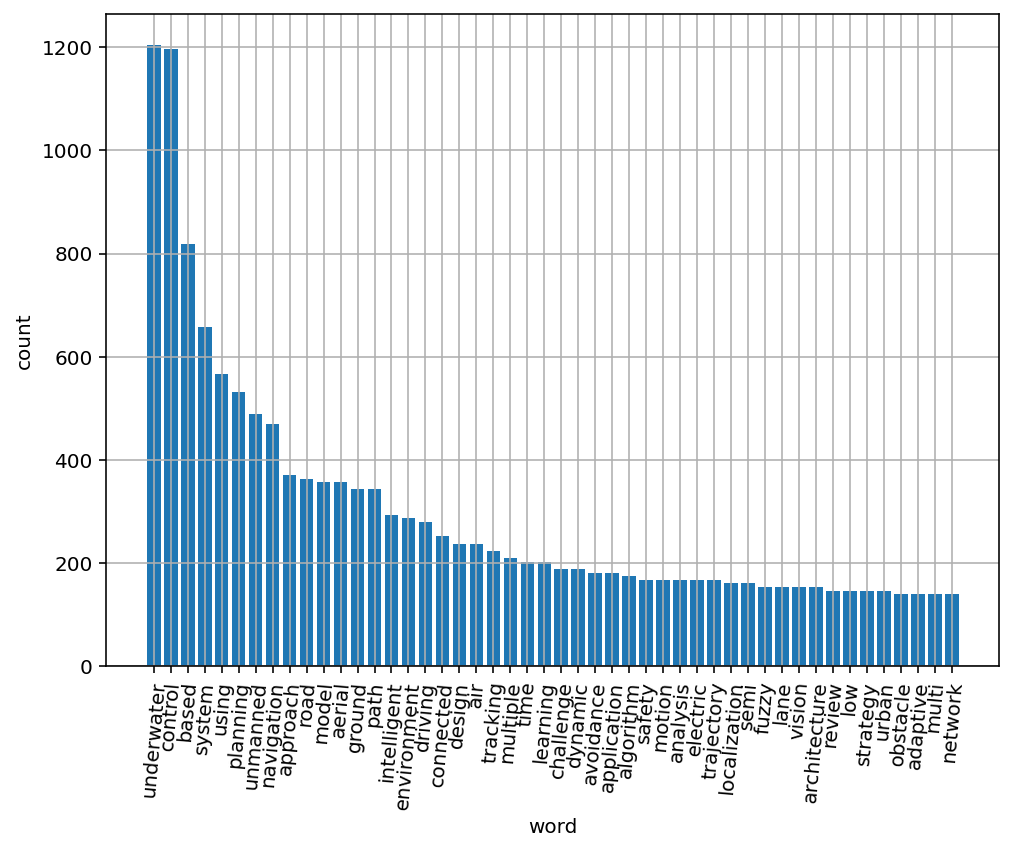

In [34]:
plt.figure(figsize=(8,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show

In [36]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1991,3
1,1992,4
2,1993,20
3,1994,38
4,1995,35
5,1996,30
6,1997,12
7,1998,19
8,1999,15
9,2000,21


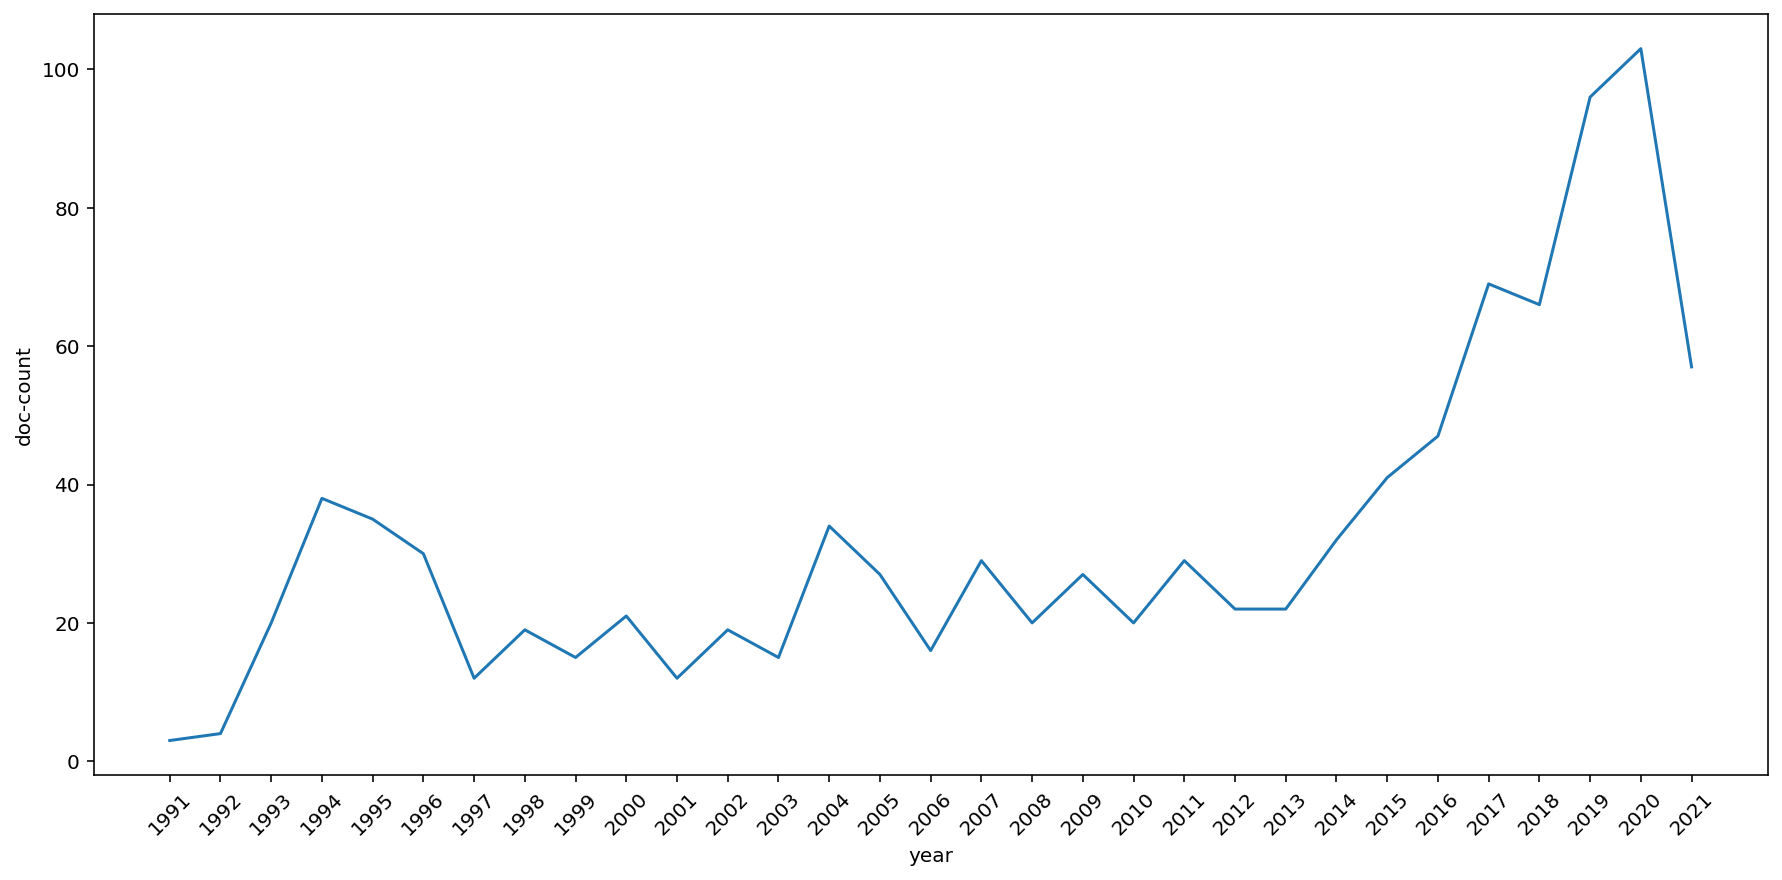

In [41]:
plt.figure(figsize=(15,7))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']], rotation='45')

plt.show()

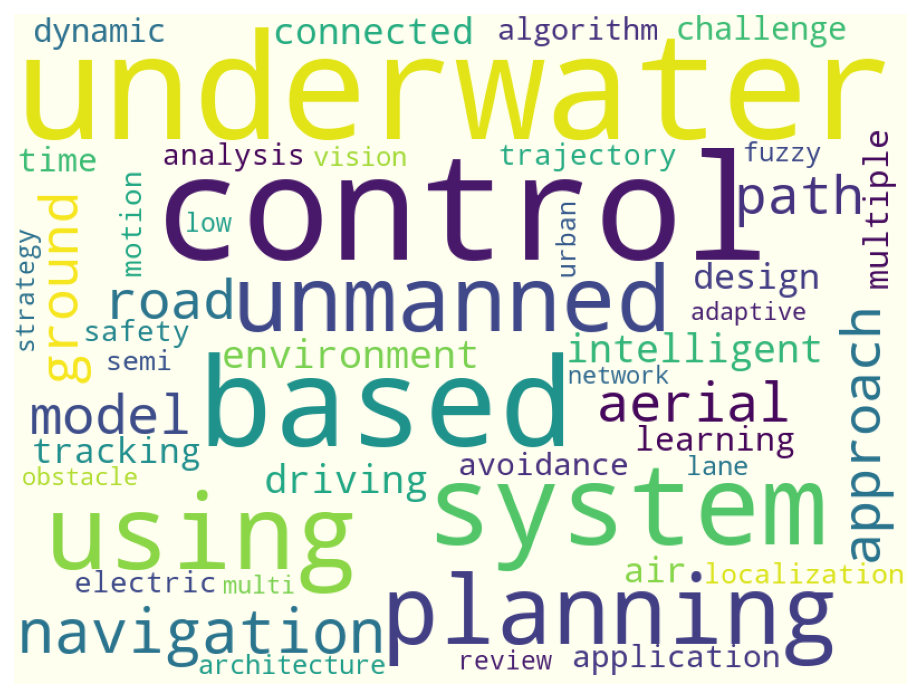

In [46]:
stopwords=set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [55]:
age_list = [10,20,30]
age_list2 = [[10,20,30],[100,200,300]]
reduce(lambda total, list1 : total + list1, age_list, 0)
# total, list1: parameter이름, 아무거나 써도 됨.
# total + list1: 스칼러로 합할 연산 기준
# age_list: 실제 입려값으로 사용할 1차원 리스트
# 0: 0차원 스칼라
# total: 스칼라값이 저장될 하나의 변수

60

In [53]:
reduce(lambda total, list2: total+ list2, age_list2, [])
# total, list2: parameter이름, 아무거나 써도 됨.
# total + list2: 1차원 리스트(벡터)로 합할 연산 기준
# age_list2: 실제 입려값으로 사용할 2차원 리스트
# []: 1차원 리스트
# total: 1차원 리스트가 저장될 리스트

[10, 20, 30, 100, 200, 300]

In [54]:
lambda total, list2: total+ list2, age_list2, []

(<function __main__.<lambda>(total, list2)>,
 [[10, 20, 30], [100, 200, 300]],
 [])